# 网格调优

No handles with labels found to put in legend.
findfont: Font family ['STSong'] not found. Falling back to DejaVu Sans.


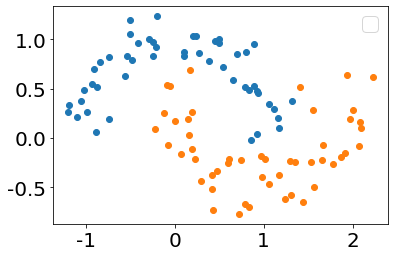

Fitting 5 folds for each of 125 candidates, totalling 625 fits
{'C': 10, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
<class 'numpy.ndarray'>
最优正确率： 0.89
预分类0： [1]
0.89


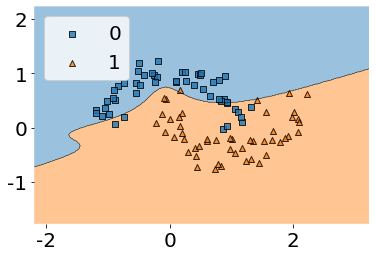

预分类 [1]
0.89


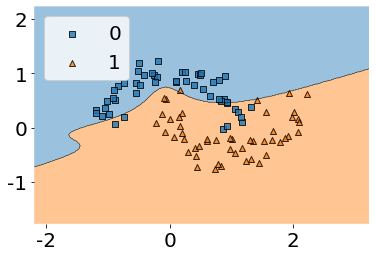

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score,recall_score,f1_score
#SVM算法
#修改字体和字号
matplotlib.rcParams['font.family'] = 'STSong'
matplotlib.rcParams['font.size'] = 20

#数据集
X,y = datasets.make_moons(noise=0.15,random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

plt.legend()
plt.show()
param_grid = {'C':[0.1,1,10,100,1000],'degree':[2,3,4,5,6],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,n_jobs=-1,verbose=3)
grid.fit(X,y)
print(grid.best_params_)
alg = grid.best_estimator_
pre = grid.predict([[0.8,0.4]])
print(type(pre))
print("最优正确率：",grid.score(X,y))
print("预分类0：",pre)
plot_decision_regions(X,y,clf=grid)
print(grid.score(X,y))
plt.legend(loc='upper left')
plt.show()

svm = SVC(kernel=grid.best_params_['kernel'],degree = grid.best_params_["degree"],random_state=0,gamma=grid.best_params_["gamma"],C=grid.best_params_['C']).fit(X,y)
print("预分类",svm.predict([[0.8,0.4]]))
plot_decision_regions(X,y,clf=svm)
print(svm.score(X,y))
plt.legend(loc='upper left')
plt.show()
